In [7]:
from bagpy import bagreader
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

# %matplotlib widget

In [3]:
matplotlib.style.use('default')

In [4]:
directory = '/home/jin/work/MT/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/Jin24_03/'
b = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if not os.path.isdir(f):
        b.append(bagreader(f))

[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/Jin24_03/jin_response4 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/Jin24_03/jin_response3 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/Jin24_03/jin_response2 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/workspace/src/plotter/experiment/launch/bag/Jin24_03/jin_response5 already exists. Not creating.


In [5]:
# Get topics in bag
b[0].topic_table

,Topics,Types,Message Count,Frequency
0,exp_data,sync_msgs/ExperimentData,1,NaN
1,q,sync_msgs/CustomData,80203,200.000360
2,response,sync_msgs/response,20,0.049975
3,state,sync_msgs/SyncQ,80196,200.000360
4,traj,sync_msgs/CustomData,80203,200.000360


In [9]:
# Make csv of given topics
meta_data_list = []
state_msg_list = []
response_msg_list = []
ref_msg_list = []
for bag in b:
    meta_data_list.append(bag.message_by_topic('exp_data'))
    state_msg_list.append(bag.message_by_topic('state'))
    response_msg_list.append(bag.message_by_topic('response'))
    ref_msg_list.append(bag.message_by_topic('traj'))

In [11]:
def csv2df(csv_list):
    df_list = []
    for csv in csv_list:
            df_list.append(pd.read_csv(csv))
    return df_list

In [12]:
meta_df_list = csv2df(meta_data_list)
state_df_list = csv2df(state_msg_list)
response_df_list = csv2df(response_msg_list)
ref_df_list = csv2df(ref_msg_list)

In [6]:
# Make csv of given topic
meta_data = b.message_by_topic('exp_data')
state_msg = b.message_by_topic('state')
response_msg = b.message_by_topic('response')
ref_msg = b.message_by_topic('traj')

In [7]:
# Turn csv into dataframes
meta_df = pd.read_csv(meta_data)
state_df = pd.read_csv(state_msg)
response_df = pd.read_csv(response_msg)
ref_df = pd.read_csv(ref_msg)


In [14]:
# Experiment Information
meta_df_list[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,mode,mass_0,mass_1,mass_2,trials_0,trials_1,trials_2,trial_length
0,89.433997,0,89,433996702,NaN,TRIAL,0.0,1.0,2.0,6.0,7.0,7.0,20.0


In [15]:
# Response Analysis Data
response_df_list[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,overshoot,rise_t,settle_t,ringing
0,109.443993,0,109,443993418,NaN,0.752514,11.465002,0.0,0.0
1,129.458991,1,129,458990736,NaN,0.951712,11.544998,0.0,0.0
2,149.463992,2,149,463992173,NaN,0.067395,13.030001,0.0,0.0
3,169.473991,3,169,473991161,NaN,1.119317,11.610000,0.0,0.0
4,189.483990,4,189,483990128,NaN,1.241312,12.049993,0.0,0.0
5,209.483997,5,209,483996771,NaN,1.541591,11.350005,0.0,0.0
6,229.493990,6,229,493990164,NaN,2.245894,11.609999,0.0,0.0
7,249.503992,7,249,503991983,NaN,0.502086,11.664998,0.0,0.0
8,269.518996,8,269,518996006,NaN,0.697066,11.529996,0.0,0.0
9,289.528992,9,289,528991787,NaN,1.117684,11.524993,0.0,0.0


In [16]:
ref_df_list[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,value.data
0,90.442122,17887,90,442121777,NaN,30.0
1,90.443992,17888,90,443991895,NaN,30.0
2,90.448994,17889,90,448994471,NaN,30.0
3,90.454004,17890,90,454003519,NaN,30.0
4,90.458999,17891,90,458999453,NaN,30.0
...,...,...,...,...,...,...
80198,491.428989,98085,491,428989023,NaN,30.0
80199,491.433995,98086,491,433995125,NaN,30.0
80200,491.438990,98087,491,438989976,NaN,30.0
80201,491.443990,98088,491,443989957,NaN,30.0


In [17]:
state_df_list[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,state.q_state.q,state.q_state.qd,state.q_state.qdd,state.tau,state.force_up,state.force_down,high
0,89.443992,17888,89,443991895,NaN,34.396903,-1.153719,2.163460,0.000000,0.000000,0.0,False
1,89.448994,17889,89,448994471,NaN,34.396903,-1.153719,2.163460,0.000000,0.000000,0.0,False
2,89.454004,17890,89,454003519,NaN,34.391359,-1.108888,8.966146,0.000000,0.000000,0.0,False
3,89.458999,17891,89,458999453,NaN,34.386030,-1.065799,8.617744,0.000000,0.000000,0.0,False
4,89.463987,17892,89,463987411,NaN,34.380908,-1.024385,8.282879,0.000000,0.000000,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
80191,490.428989,98085,490,428989023,NaN,28.443606,1.995656,1.328071,0.023596,0.017006,0.0,False
80192,490.433995,98086,490,433995125,NaN,28.453617,2.002248,1.318424,0.023608,0.017015,0.0,False
80193,490.438990,98087,490,438989976,NaN,28.463661,2.008793,1.308875,0.023621,0.017024,0.0,False
80194,490.443990,98088,490,443989957,NaN,28.473742,2.016122,1.465866,0.024416,0.017597,0.0,False


In [18]:
def draw_mass_background(state_Df, Mass_Order, Mass_Trial, Trial_Length, Delay, axis, min, max):
    """
    state_Df: state data frame
    Mass_Order: float/int list of mass (in order)
    Mass_Trial: int list with number of trials per mass. Must have same length as Mass_Order
    Trial_Length: float/int of length of trial
    Delay: int (for now) of delay between state and reference.
    axis: matplotlib axis to plot on
    min: min value of plot
    max: max value of plot
    """
    i = 0
    exp_start = state_Df['Time'].iloc[0]
    trial_start = 0
    trial_end = 0
    for mass in Mass_Order:
        if i == 0:
            trial_end = exp_start + Mass_Trial[i]*Trial_Length + Delay
        else:
            trial_end = trial_start + Mass_Trial[i]*Trial_Length
        
        if mass == 0.0:
            axis.fill_between((trial_start, trial_end), min, max, alpha=0.2, color='green')
        elif mass == 1.0:
            axis.fill_between((trial_start, trial_end), min, max, alpha=0.2, color='yellow')
        elif mass == 2.0:
            axis.fill_between((trial_start, trial_end), min, max, alpha=0.2, color='red')
        trial_start = trial_end
        i=+1


In [8]:
mass_order = [meta_df['mass_0'].iloc[0], meta_df['mass_1'].iloc[0], meta_df['mass_2'].iloc[0]]
mass_trial = [meta_df['trials_0'].iloc[0], meta_df['trials_1'].iloc[0], meta_df['trials_2'].iloc[0]]
trial_length = meta_df['trial_length'].iloc[0]
delay = 1.0

[1.0, 2.0, 0.0]

In [19]:
def plot_q(axis, background, reference, state_dataframe, ref_dataframe, meta_dataframe):
    axis.plot('Time', 'state.q_state.q', data= state_dataframe, color = 'red', linewidth = 1.0)
    if reference:
        axis.plot('Time', 'value.data', data=ref_dataframe, color='black', linewidth=1.0)
    axis.set_title('q')
    if background:
        mass_order = [meta_dataframe['mass_0'].iloc[0], meta_dataframe['mass_1'].iloc[0], meta_dataframe['mass_2'].iloc[0]]
        mass_trial = [meta_dataframe['trials_0'].iloc[0], meta_dataframe['trials_1'].iloc[0], meta_dataframe['trials_2'].iloc[0]]
        trial_length = meta_df['trial_length'].iloc[0]
        delay = 1.0 # TODO: include delay into meta dataframe
        draw_mass_background(state_dataframe, mass_order, mass_trial, trial_length, delay, axis, )
    return 0

def plot_qd(axis, background, reference):
    return 0

def plot_qdd(axis, background, reference):
    return 0

def plot_tau(axis, background, reference):
    return 0

def plot_state(plot_list, background, reference):
    """
    plot_list: string list of data to plot. q, qd, qdd and tau are possible
    background: boolean whether background should be colored based on mass
    reference: boolean whether to plot reference trajectory
    """
    fig, axs = plt.subplots(len(plot_list))
    i = 0
    for plot in plot_list:
        if plot == 'q':
            plot_q(axs[i], background, reference)
        elif plot == 'qd':
            plot_qd(axs[i], background, reference)
        elif plot == 'qdd':
            plot_qdd(axs[i], background, reference)
        elif plot == 'tau':
            plot_tau(axs[i], background, reference)
        i=+1
    return fig, axs

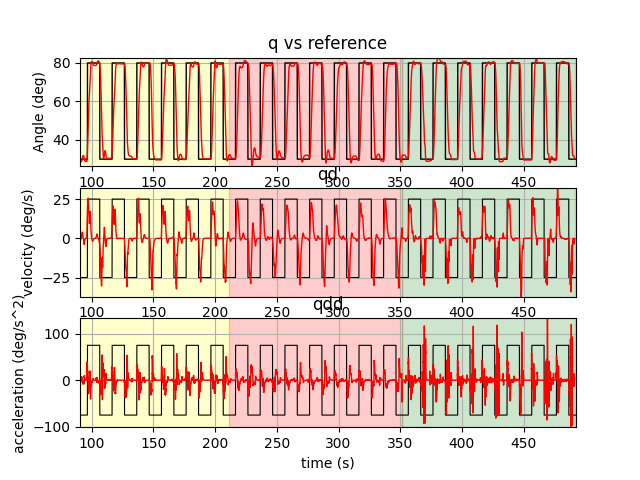

In [48]:
try:
    plt.close(fig)
finally:
    # do nothing
    fig, (ax_q, ax_qd, ax_qdd) = plt.subplots(3)
    ax_q.plot('Time', 'value.data', data=ref_df, color='black', linewidth=1.0)
    ax_q.plot('Time', 'state.q_state.q', data = state_df, color = 'red', linewidth=1.0)
    ax_q.set(xlim=(state_df['Time'].iloc[0], ref_df['Time'].iloc[-1]), ylim=(state_df['state.q_state.q'].min(), state_df['state.q_state.q'].max()))
    draw_mass_background(state_df, mass_order, mass_trial, trial_length, delay, ax_q, state_df['state.q_state.q'].min(), state_df['state.q_state.q'].max())
    ax_q.set_title('q vs reference')
    ax_q.set_ylabel('Angle (deg)')
    ax_q.grid()

    ax_qd.plot(ref_df['Time'], ref_df['value.data']-55, color='k', linewidth = 0.8)
    ax_qd.plot('Time', 'state.q_state.qd', data=state_df, color = 'red', linewidth=1.0)
    ax_qd.set(xlim=(state_df['Time'].iloc[0], ref_df['Time'].iloc[-1]), ylim=(state_df['state.q_state.qd'].min(), state_df['state.q_state.qd'].max()))
    draw_mass_background(state_df, mass_order, mass_trial, trial_length, delay, ax_qd, state_df['state.q_state.qd'].min(), state_df['state.q_state.qd'].max())
    ax_qd.set_title('qd')
    ax_qd.set_ylabel('velocity (deg/s)')
    ax_qd.grid()

    ax_qdd.plot(ref_df['Time'], (ref_df['value.data']-55)*3, color='k', linewidth = 0.8)
    ax_qdd.plot('Time', 'state.q_state.qdd', data=state_df, color = 'red', linewidth=1.0)
    ax_qdd.set(xlim=(state_df['Time'].iloc[0], ref_df['Time'].iloc[-1]), ylim=(state_df['state.q_state.qdd'].min(), state_df['state.q_state.qdd'].max()))
    draw_mass_background(state_df, mass_order, mass_trial, trial_length, delay, ax_qdd, state_df['state.q_state.qdd'].min(), state_df['state.q_state.qdd'].max())
    ax_qdd.set_title('qdd')
    ax_qdd.set_xlabel('time (s)')
    ax_qdd.set_ylabel('acceleration (deg/s^2)')
    ax_qdd.grid()


In [20]:
def plot_rising(axis):
    return 0

def plot_overshoot(axis):
    return 0

def plot_settling(axis):
    return 0

def plot_ringing(axis):
    return 0

def plot_response(plot_list, background, reference):
    """
    plot_list: string list 
    """
    return 0

/tmp/ipykernel_6611/3362246481.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


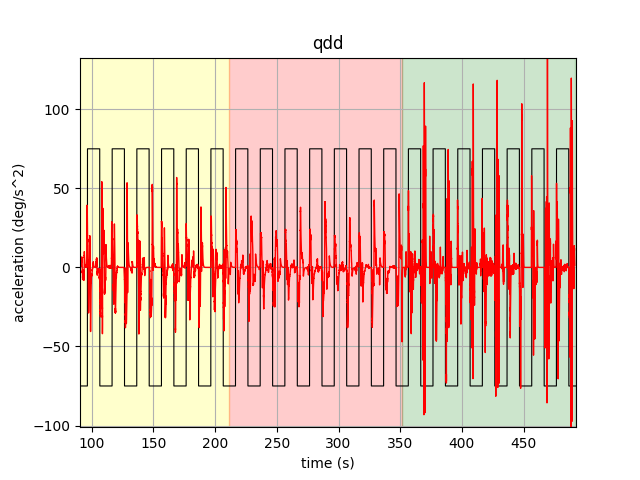

In [46]:
fig, ax = plt.subplots()

ax.plot(ref_df['Time'], (ref_df['value.data']-55)*3, color='k', linewidth = 0.8)
ax.plot('Time', 'state.q_state.qdd', data=state_df, color = 'red', linewidth=1.0)
ax.set(xlim=(state_df['Time'].iloc[0], ref_df['Time'].iloc[-1]), ylim=(state_df['state.q_state.qdd'].min(), state_df['state.q_state.qdd'].max()))
draw_mass_background(state_df, mass_order, mass_trial, trial_length, delay, ax, state_df['state.q_state.qdd'].min(), state_df['state.q_state.qdd'].max())
ax.set_title('qdd')
ax.set_xlabel('time (s)')
ax.set_ylabel('acceleration (deg/s^2)')
ax.grid()

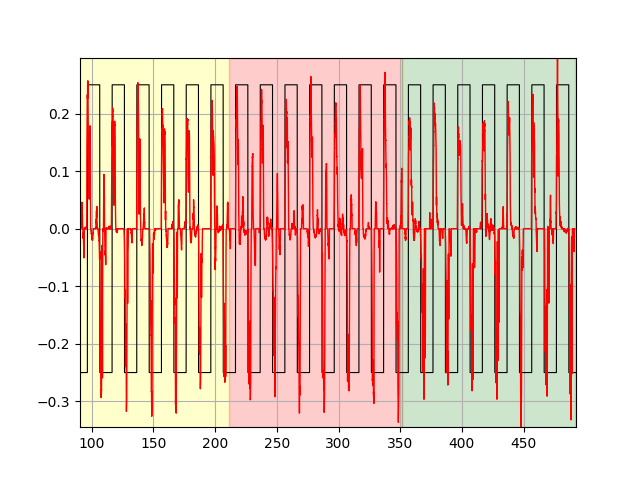

In [55]:
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(ref_df['Time'], (ref_df['value.data']-55)/100, color='k', linewidth = 0.8)
ax.plot('Time', 'state.tau', data=state_df, color = 'red', linewidth=1.0)
ax.set(xlim=(state_df['Time'].iloc[0], ref_df['Time'].iloc[-1]), ylim=(state_df['state.tau'].min(), state_df['state.tau'].max()))
draw_mass_background(state_df, mass_order, mass_trial, trial_length, delay, ax, state_df['state.tau'].min(), state_df['state.tau'].max())

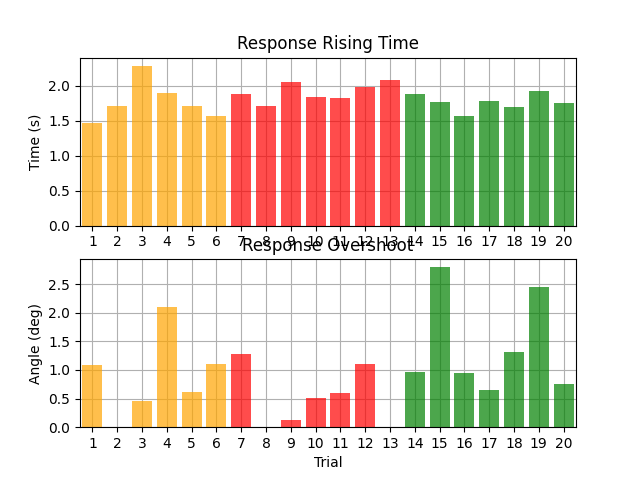

In [49]:
fig, (ax_rise, ax_over) = plt.subplots(2)
ax_rise.grid()
ax_rise.set_axisbelow(True)

i = 0
trial = 0
for mass in mass_order:
    color = ''
    if mass == 0.0:
        color = 'green'
    elif mass == 1.0:
        color = 'orange'
    elif mass == 2.0:
        color = 'red'
    ax_rise.bar(response_df['header.seq'].iloc[trial:int(trial+mass_trial[i])]+1, response_df['rise_t'].iloc[trial:int(trial+mass_trial[i])]-10, color=color, alpha=0.7)
    trial= int(trial + mass_trial[i])
    i=+1

ax_rise.set_title('Response Rising Time')
ax_rise.set_ylabel('Time (s)')
ax_rise.set_xlim((1-0.5, 20+0.5))
ax_rise.set_xticks(np.arange(1, 20+1))

i = 0
trial = 0
for mass in mass_order:
    color = ''
    if mass == 0.0:
        color = 'green'
    elif mass == 1.0:
        color = 'orange'
    elif mass == 2.0:
        color = 'red'
    ax_over.bar(response_df['header.seq'].iloc[trial:int(trial+mass_trial[i])]+1, response_df['overshoot'].iloc[trial:int(trial+mass_trial[i])], color=color, alpha=0.7)
    trial= int(trial + mass_trial[i])
    i=+1
# ax_over.bar(response_df['header.seq']+1, response_df['overshoot'])
ax_over.grid()
ax_over.set_axisbelow(True)
ax_over.set_title('Response Overshoot')
ax_over.set_ylabel('Angle (deg)')
ax_over.set_xlabel('Trial')
ax_over.set_xlim(1 - 0.5, 20 + 0.5)
ax_over.set_xticks(np.arange(1, 20+1))